In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [1]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import tensorflow as tf
from tensorflow import keras
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tensorflow.python import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras import models, layers, metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/Capstone/data/depression_pre.csv"
dp = pd.read_csv(path)

path2 = "/content/drive/My Drive/Capstone/data/depression_post.csv"
dp_post = pd.read_csv(path2)

path3 = "/content/drive/My Drive/Capstone/data/anxiety_pre.csv"
anx_pre = pd.read_csv(path3)

path4 = "/content/drive/My Drive/Capstone/data/anxiety_post.csv"
anx_post = pd.read_csv(path4)

path5 = "/content/drive/My Drive/Capstone/data/adhd_pre.csv"
adhd_pre = pd.read_csv(path5)

path6 = "/content/drive/My Drive/Capstone/data/adhd_post.csv"
adhd_post = pd.read_csv(path6)

path7 = "/content/drive/My Drive/Capstone/data/bipolar_pre.csv"
bi_pre = pd.read_csv(path7)

path8 = "/content/drive/My Drive/Capstone/data/bipolar_post.csv"
bi_post = pd.read_csv(path8)

path9 = "/content/drive/My Drive/Capstone/data/ptsd_pre.csv"
pt_pre = pd.read_csv(path9)

path10 = "/content/drive/My Drive/Capstone/data/ptsd_post.csv"
pt_post = pd.read_csv(path10)

path11 = "/content/drive/My Drive/Capstone/data/schiz_pre.csv"
sc_pre = pd.read_csv(path11)

path12 = "/content/drive/My Drive/Capstone/data/schiz_post.csv"
sc_post = pd.read_csv(path12)

path13 = "/content/drive/My Drive/Capstone/data/ed_pre.csv"
ed_pre = pd.read_csv(path13)

path14 = "/content/drive/My Drive/Capstone/data/ed_post.csv"
ed_post = pd.read_csv(path14)

path15 = "/content/drive/My Drive/Capstone/data/bf_pre.csv"
bf_pre = pd.read_csv(path15)

path16 = "/content/drive/My Drive/Capstone/data/bf_post.csv"
bf_post = pd.read_csv(path16)

path17 = "/content/drive/My Drive/Capstone/data/sw_pre.csv"
sw_pre = pd.read_csv(path17)

path18 = "/content/drive/My Drive/Capstone/data/sw_post.csv"
sw_post = pd.read_csv(path18)

dp_pre_txt = dp[["Post Text"]]
dp_post_txt = dp_post[["Post Text"]]
anx_pre_txt = anx_pre[["Post Text"]]
anx_post_txt = anx_post[["Post Text"]]
adhd_pre_txt = adhd_pre[["Post Text"]]
adhd_post_txt = adhd_post[["Post Text"]]
bi_pre_txt = bi_pre[["Post Text"]]
bi_post_txt = bi_post[["Post Text"]]
pt_pre_txt = pt_pre[["Post Text"]]
pt_post_txt = pt_post[["Post Text"]]
sc_pre_txt = sc_pre[["Post Text"]]
sc_post_txt = sc_post[["Post Text"]]
ed_pre_txt = ed_pre[["Post Text"]]
ed_post_txt = ed_post[["Post Text"]]
bf_pre_txt = bf_pre[["Post Text"]]
bf_post_txt = bf_post[["Post Text"]]
sw_pre_txt = sw_pre[["Post Text"]]
sw_post_txt = sw_post[["Post Text"]]

# concat datasets by pre vs post

In [5]:
pre_txt = pd.concat([dp_pre_txt, anx_pre_txt, adhd_pre_txt, bi_pre_txt, pt_pre_txt, sc_pre_txt, ed_pre_txt, bf_pre_txt, sw_pre_txt])
post_txt = pd.concat([dp_post_txt, anx_post_txt, adhd_post_txt, bi_post_txt, pt_post_txt, sc_post_txt, ed_post_txt, bf_post_txt, sw_post_txt])

clear post text

In [6]:
pre_txt['Post Text'] = pre_txt['Post Text'].values
post_txt['Post Text'] = post_txt['Post Text'].values

pre_txt['Post Text'].fillna('', inplace=True)
pre_txt.dropna(subset=['Post Text'], inplace=True)

post_txt['Post Text'].fillna('', inplace=True)
post_txt.dropna(subset=['Post Text'], inplace=True)

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

pre_txt['Post Text'] = pre_txt['Post Text'].apply(remove_punctuations)
post_txt['Post Text'] = post_txt['Post Text'].apply(remove_punctuations)

pre_txt['Post Text'] = pre_txt['Post Text'].replace('\n','', regex=True)
post_txt['Post Text'] = post_txt['Post Text'].replace('\n','', regex=True)

pre_txt['Post Text'] = pre_txt['Post Text'].str.lower()
post_txt['Post Text'] = post_txt['Post Text'].str.lower()

In [7]:
pre_txt['covid'] = 'pre'
post_txt['covid'] = 'post'

In [8]:
df = pd.concat([pre_txt, post_txt])

In [9]:
df_pre = df[df['covid']=='pre']

In [10]:
df_post = df[df['covid']=='post']

In [11]:
df_post_downsample = df_post.sample(df_pre.shape[0])
df_post_downsample.shape

(2047, 2)

In [12]:
df = pd.concat([df_pre, df_post_downsample])
df.shape

(4094, 2)

In [13]:
df['covid'].value_counts()

covid
pre     2047
post    2047
Name: count, dtype: int64

In [14]:
df['label'] = df.covid.map({'pre':0, 'post':1})
df.sample(3)

,Post Text,covid,label
450,the thing is i’ve stopped caringi just want to...,post,1
348,,post,1
15,,pre,0


In [15]:
df.to_pickle("/content/drive/My Drive/Capstone/data/df.pkl")

# train model

In [16]:
df_model = pd.read_pickle("/content/drive/My Drive/Capstone/data/df.pkl")

In [17]:
df_model

,Post Text,covid,label
0,its stupid but i always doubt the fact i have ...,pre,0
1,my parents keep asking me this questiontoday i...,pre,0
2,be me have chronic depression and social anxi...,pre,0
3,thats all i want i wanna go to a park lay on t...,pre,0
4,and i scored in the severe range this lead to ...,pre,0
...,...,...,...
91,,post,1
367,,post,1
462,this turned out to be quite a long ramblevent ...,post,1
8,i bring my lunch with me to work every day and...,post,1


In [19]:
max_words = 10000
cv = CountVectorizer(max_features=max_words, stop_words='english')
sparse_matrix = cv.fit_transform(df_model['Post Text']).toarray()

In [20]:
sparse_matrix.shape

(4094, 10000)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(df_model['label']))

In [23]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(10000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [24]:
model = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)

x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()

train1

In [26]:
epochs = 5
model.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.4710047245025635, Accuracy: 71.88925170898438%
Epoch: 2, Loss: 0.4263458251953125, Accuracy: 73.64820861816406%
Epoch: 3, Loss: 0.380070298910141, Accuracy: 84.5276870727539%
Epoch: 4, Loss: 0.34893903136253357, Accuracy: 84.72312927246094%
Epoch: 5, Loss: 0.31645554304122925, Accuracy: 85.3094482421875%


train2

In [40]:
epochs = 5
model.train()
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    accuracy_values.append(acc.item())
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.item()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.29369258880615234, Accuracy: 85.76547241210938%
Epoch: 2, Loss: 0.2749020755290985, Accuracy: 86.22149658203125%
Epoch: 3, Loss: 0.2597404718399048, Accuracy: 86.67752075195312%
Epoch: 4, Loss: 0.24973861873149872, Accuracy: 87.06840515136719%
Epoch: 5, Loss: 0.24327662587165833, Accuracy: 87.32898712158203%


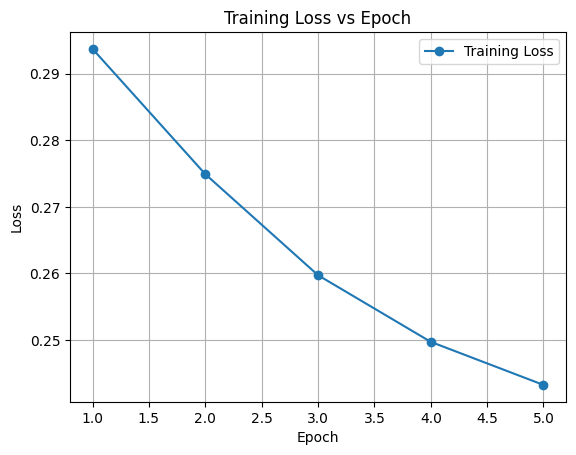

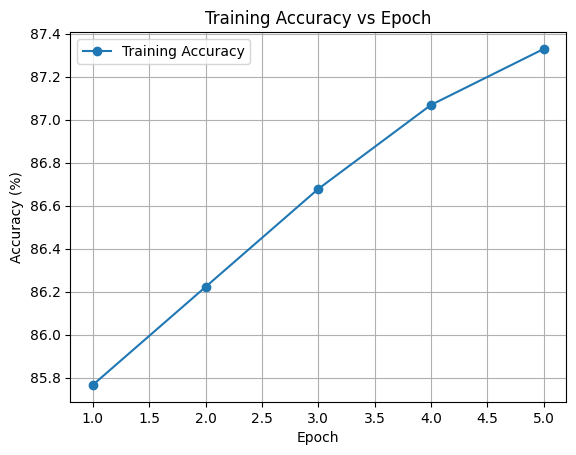

In [41]:
# Plotting the loss
plt.plot(range(1, epochs + 1), loss_values, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the accuracy
plt.plot(range(1, epochs + 1), accuracy_values, marker='o', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

train3

In [32]:
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

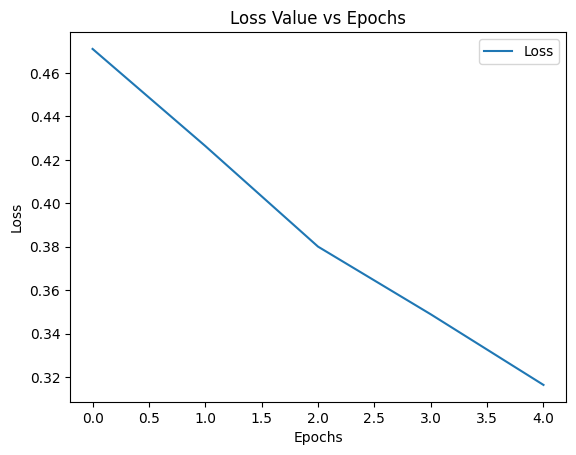

In [33]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

In [35]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    acc_percent = 100*pred/len(x_test)
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 63.76953125%


In [38]:
accuracy_list = []

for epoch in range(epochs):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test)
        pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
        acc_percent = 100 * pred / len(x_test)
        accuracy_list.append(acc_percent)

        print("Epoch {}: Accuracy : {}%".format(epoch + 1, acc_percent))


Epoch 1: Accuracy : 63.76953125%
Epoch 2: Accuracy : 63.76953125%
Epoch 3: Accuracy : 63.76953125%
Epoch 4: Accuracy : 63.76953125%
Epoch 5: Accuracy : 63.76953125%


train2-1

In [44]:
epochs = 10
model.train()
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    accuracy_values.append(acc.item())
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.item()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.23670373857021332, Accuracy: 87.68729400634766%
Epoch: 2, Loss: 0.23438827693462372, Accuracy: 87.68729400634766%
Epoch: 3, Loss: 0.23140868544578552, Accuracy: 87.81758880615234%
Epoch: 4, Loss: 0.22780367732048035, Accuracy: 87.98045349121094%
Epoch: 5, Loss: 0.22390270233154297, Accuracy: 87.9153060913086%
Epoch: 6, Loss: 0.22281067073345184, Accuracy: 87.9153060913086%
Epoch: 7, Loss: 0.22314518690109253, Accuracy: 87.98045349121094%
Epoch: 8, Loss: 0.22148773074150085, Accuracy: 88.01303100585938%
Epoch: 9, Loss: 0.21897803246974945, Accuracy: 88.07817840576172%
Epoch: 10, Loss: 0.217379629611969, Accuracy: 88.07817840576172%


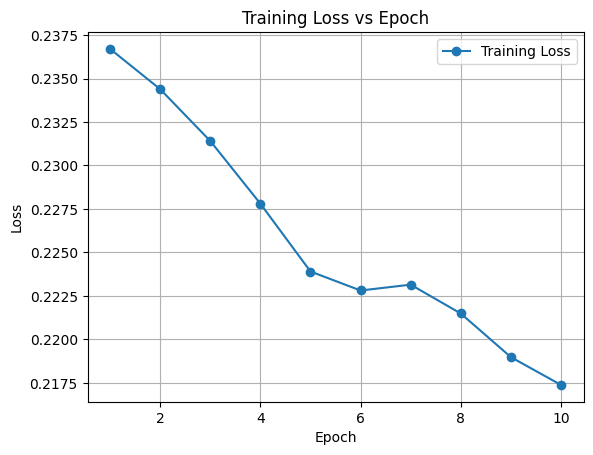

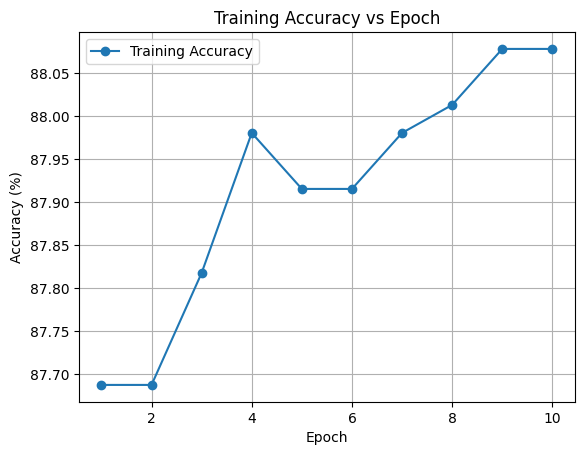

In [45]:
# Plotting the loss
plt.plot(range(1, epochs + 1), loss_values, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the accuracy
plt.plot(range(1, epochs + 1), accuracy_values, marker='o', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs Epoch')
plt.grid(True)
plt.legend()
plt.show()